In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root = 'data/', download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 90011174.06it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 83197591.91it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 23482784.56it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16296431.79it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [4]:
import matplotlib.pyplot as plt

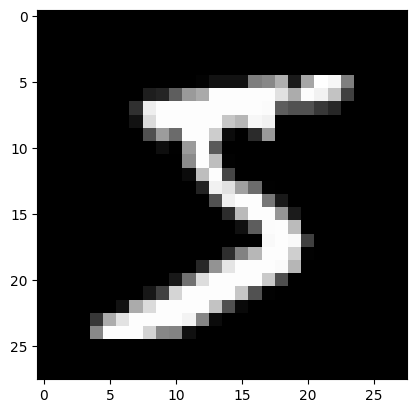

In [5]:
plt.imshow(dataset[0][0], cmap='gray')

In [6]:
import torchvision.transforms as transforms

In [7]:
df = MNIST(root='data/',
           train=True,
           transform=transforms.ToTensor())

In [8]:
img_tensor, label = df[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [9]:
import numpy as np

def split_indices(n, val_per):
    # determine size of validation set, total_size * valid_split_perct
    n_val = int(n*val_per)
    # create random permutation of 0 - n-1
    idxs = np.random.permutation(n)
    # we split the indices into training set and validation set
    return idxs[n_val:], idxs[:n_val]

In [10]:
train_indices, val_indices = split_indices(len(df), 0.2)

In [11]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [12]:
batch_size=100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(df,
                          batch_size,
                          sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(df,
                          batch_size,
                          sampler=val_sampler)


In [13]:
images, label = df[0]

In [14]:
import torch.nn as nn

In [15]:
input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [16]:
# for images, labels in train_loader:
#   print(labels)
#   print(images.shape)
#   outputs = model(images)
#   break

In [17]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    # defining the linear model for our neural network
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    # returning the output after reshaping the input batch
    return self.linear(xb)

model = MnistModel()

In [18]:
print("Weights: ", list(model.linear.weight.shape),
      "\nBiases: ", list(model.linear.bias.shape))

Weights:  [10, 784] 
Biases:  [10]


In [19]:
for images, label in train_loader:
  out = model(images)
  break

out

tensor([[ 1.1524e-01,  9.4164e-02, -1.0484e-01, -1.9529e-01,  1.2781e-01,
         -6.7847e-02, -2.7658e-02, -2.1019e-01,  8.9691e-02,  8.2738e-03],
        [ 2.5481e-02,  1.2199e-01, -1.1792e-01, -2.2244e-01,  3.9319e-01,
          4.4441e-01,  2.4092e-01, -2.1223e-01,  3.4856e-01, -2.4845e-01],
        [ 1.0721e-01,  2.6472e-01,  1.3028e-01, -7.8550e-03, -1.2350e-03,
          4.8714e-02,  2.5811e-01, -9.6997e-02,  2.2053e-01, -4.8105e-02],
        [ 2.8739e-01, -1.1759e-01,  2.1523e-01, -2.7882e-01,  1.1292e-01,
          3.2975e-01,  1.3305e-01, -5.0925e-02,  1.7823e-01, -4.5697e-01],
        [ 2.2524e-01,  1.0047e-01,  9.7029e-02,  2.0886e-01,  4.6505e-01,
          1.5773e-01,  2.4237e-01,  2.1290e-02,  3.3701e-01, -2.4732e-01],
        [ 2.8031e-01,  4.1455e-01,  1.5184e-01, -2.2971e-01,  5.5467e-01,
          2.6710e-01,  9.2092e-02, -4.3897e-01,  2.5509e-01, -5.7419e-01],
        [ 3.7935e-02,  5.8434e-02,  4.8226e-02,  1.7072e-01,  1.5581e-01,
          1.6019e-01,  5.6550e-0

In [20]:
label

tensor([8, 2, 4, 2, 4, 5, 1, 1, 1, 0, 2, 8, 6, 7, 9, 0, 3, 3, 7, 2, 7, 9, 0, 8,
        1, 6, 7, 2, 3, 6, 9, 4, 7, 4, 1, 3, 9, 7, 2, 3, 5, 0, 5, 5, 3, 3, 3, 2,
        5, 2, 4, 5, 6, 0, 3, 3, 3, 2, 7, 0, 4, 1, 7, 0, 6, 6, 5, 6, 6, 1, 5, 1,
        3, 0, 7, 1, 8, 4, 5, 5, 0, 8, 1, 8, 8, 2, 4, 5, 8, 5, 2, 1, 4, 9, 8, 7,
        4, 3, 9, 7])

In [21]:
out[0]

tensor([ 0.1152,  0.0942, -0.1048, -0.1953,  0.1278, -0.0678, -0.0277, -0.2102,
         0.0897,  0.0083], grad_fn=<SelectBackward0>)

In [22]:
import torch.nn.functional as F

In [23]:
probs = F.softmax(out, dim=1)

print("Sample probabilities:\n", probs[0])

print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([0.1133, 0.1110, 0.0910, 0.0831, 0.1148, 0.0944, 0.0983, 0.0819, 0.1105,
        0.1018], grad_fn=<SelectBackward0>)
Sum:  1.0


In [24]:
torch.sum(probs[0])

tensor(1., grad_fn=<SumBackward0>)

In [25]:
# to predict, we choose the index of the max probability
max_probs, preds = torch.max(probs, dim=1)
preds

tensor([4, 5, 1, 5, 4, 4, 8, 1, 5, 2, 8, 0, 2, 5, 3, 1, 1, 8, 5, 4, 1, 0, 5, 1,
        0, 0, 4, 5, 2, 5, 0, 4, 5, 4, 5, 1, 0, 4, 4, 5, 2, 8, 1, 8, 4, 4, 4, 5,
        6, 5, 2, 1, 0, 5, 4, 8, 8, 5, 5, 5, 4, 5, 1, 1, 4, 5, 8, 2, 5, 5, 4, 0,
        1, 2, 5, 5, 5, 1, 2, 6, 2, 2, 5, 2, 5, 4, 4, 4, 1, 0, 5, 5, 0, 5, 4, 5,
        0, 1, 3, 5])

In [26]:
def accuracy(l1, l2):
  return torch.sum(l1 == l2).item() / len(l1)

In [27]:
accuracy(preds, label.float())

0.06

In [28]:
loss_fn = F.cross_entropy

In [29]:
loss = loss_fn(out, label)
loss

tensor(2.3153, grad_fn=<NllLossBackward0>)

In [30]:
# optimizer to update weights
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
def loss_batch(model, loss_fn, xb, yb, opt=None, metric=None):
  # calculate loss
  preds = model(xb)
  loss = loss_fn(preds, yb)

  if opt is not None:
    # compute gradients
    loss.backward()
    # update parameters
    opt.step()
    # resent gradients
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    # compute metric
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

In [32]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [33]:
def evaluate(model, loss_fn, valid_dl, metric=None):
  with torch.no_grad():
    # passing each batch through the model
    results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
    for xb, yb, in valid_dl]
    # seperate losses, counts and metrics
    losses, nums, metrics = zip(*results)
    # total dataset size
    total = np.sum(nums)
    # avg. loss across batches
    avg_loss = np.sum(np.multiply(losses, nums))/total
    avg_metric = None
    if metric is not None:
      # avg. metric across batches
      avg_metric = np.sum(np.multiply(metrics, nums))/total
  return avg_loss, total, avg_metric

In [34]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print(f"Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

Loss: 2.3242, Accuracy: 0.0947


In [35]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
  for epoch in range(epochs):
    # training
    for xb, yb in train_dl:
      loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

    # evaluation
    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result

    # printing progress
    if metric is None:
      print(f"Epoch [{epoch+1}/{epochs}], Loss: {val_loss:.4f}")
    else:
      print(f"Epoch [{epoch+1}/{epochs}], Loss: {val_loss:.4f}, {metric.__name__}: {val_metric:.4f}")

    return val_metric


In [36]:
learning_rate = 0.001

In [37]:
# redefine model and optimizer
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [38]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.8546, accuracy: 0.6794


0.6794166694084803

In [39]:
import matplotlib.pyplot as plt

In [40]:
lt = []
lt.append(fit(20, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy))

Epoch [1/20], Loss: 1.5632, accuracy: 0.7472


In [41]:
lt

[0.7472499971588452]